In [1]:
from dask.distributed import Client, LocalCluster

# Connect to an existing LocalCluster if available
# The default port is 8786
try:
    # This creates a new Client connection to an existing Dask scheduler if one exists.
    # There is no practical way to get the LocalCluster object from the existing scheduler,
    # although the scheduler details can be accessed with `client.scheduler`.
    # The LocalCluster object is only available from the notebook that created it.
    # Restart the kernel or `client.close();cluster.close()` in each notebook that
    # created one to remove existing LocalClusters.
    client = Client(f'localhost:8786', timeout='2s')
    cluster = client.cluster  # None
except:
    cluster = LocalCluster(scheduler_port=8786)
    client = Client(cluster)

display(cluster if cluster else client)

In [2]:
# Initiliaze the Gateway client
from dask.distributed import Client
from dask_gateway import Gateway

gateway = Gateway()
gateway.cluster_options()

In [3]:
clusters = gateway.list_clusters()
if not clusters:
    print('Creating new cluster. Please wait for this to finish.')
    cluster = gateway.new_cluster()
else:
    print(f'An existing cluster was found. Connecting to: {clusters[0].name}')
    cluster=gateway.connect(clusters[0].name)
display(cluster)

Creating new cluster. Please wait for this to finish.


In [4]:
min_number_of_workers = 1
max_number_of_workers = 2

# Static scaling
cluster.scale(min_number_of_workers)

# Adaptive scaling
cluster.adapt(minimum=min_number_of_workers, maximum=max_number_of_workers)

In [5]:
client = cluster.get_client()
client.wait_for_workers(n_workers=min_number_of_workers)
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: https://hub.csiro.easi-eo.solutions/services/dask-gateway/clusters/easihub.329f74dfe573427e96bb1b42b5b34202/status,


In [6]:
import pandas as pd 
import numpy as np

In [7]:
water = pd.read_csv('water_preprocesseddata.csv')
                    
water

,sample_id,cluster,Country,General_Vegetation,Weather,Hydrogeomorphology,Intermittent_or_Perennial,Sediment,US.or.DS.of.Gauge,Precipitation.Within.Week,...,NPOC_mg.L.asC,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,Richness observed,Simpson's Diversity Index
0,SW_S19S.0003_U_1,Average,0,15,3,2,1,3,0,1,...,1.27,-140.0,-18.75,0.30,9.80,0.19,0.04,0.07,2335,0.999572
1,SW_S19S.0003_U_2,Average,0,15,3,2,1,3,0,1,...,1.80,NaN,NaN,0.31,8.03,0.23,0.04,0.07,2560,0.999609
2,SW_S19S.0003_U_3,Most,0,15,3,2,1,3,0,1,...,1.15,NaN,NaN,0.31,8.62,0.23,0.04,0.06,2782,0.999641
3,SW_S19S.0004_U_1,Most,0,7,1,2,1,1,1,1,...,1.96,-129.3,-17.13,1.83,6.53,0.12,0.04,0.07,2823,0.999646
4,SW_S19S.0004_U_2,Most,0,7,1,2,1,1,1,1,...,1.93,NaN,NaN,2.00,6.66,0.12,0.04,0.08,2869,0.999651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,SW_S19S.0099_U_1,Most,6,2,7,1,0,1,1,0,...,2.30,-122.8,-16.08,70.55,47.79,4.43,0.04,0.33,2676,0.999626
261,SW_S19S.0099_U_2,Most,6,2,7,1,0,1,1,0,...,0.45,NaN,NaN,68.35,45.59,4.64,0.04,0.29,3217,0.999689
262,SW_S19S.0099_U_3,Most,6,2,7,1,0,1,1,0,...,1.62,NaN,NaN,66.16,44.37,4.75,0.04,0.30,2423,0.999587
263,SW_S19S.0100_U_1,Least,6,17,7,1,1,1,0,1,...,0.55,-43.3,-6.53,0.22,34.62,0.12,0.04,0.09,1289,0.999224


In [8]:
X = water.drop(["cluster", "sample_id", "Richness observed", "Simpson's Diversity Index"], axis=1)
y = water['cluster']

X

,Country,General_Vegetation,Weather,Hydrogeomorphology,Intermittent_or_Perennial,Sediment,US.or.DS.of.Gauge,Precipitation.Within.Week,Dam.Upstream.Site,Stream_Order,...,Approx.Distance.From.Gauge_meters,Number.Days.Since.Precip,NPOC_mg.L.asC,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL
0,0,15,3,2,1,3,0,1,0,7.0,...,3,1.0,1.27,-140.0,-18.75,0.30,9.80,0.19,0.04,0.07
1,0,15,3,2,1,3,0,1,0,7.0,...,3,1.0,1.80,NaN,NaN,0.31,8.03,0.23,0.04,0.07
2,0,15,3,2,1,3,0,1,0,7.0,...,3,1.0,1.15,NaN,NaN,0.31,8.62,0.23,0.04,0.06
3,0,7,1,2,1,1,1,1,0,6.0,...,3,1.0,1.96,-129.3,-17.13,1.83,6.53,0.12,0.04,0.07
4,0,7,1,2,1,1,1,1,0,6.0,...,3,1.0,1.93,NaN,NaN,2.00,6.66,0.12,0.04,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,6,2,7,1,0,1,1,0,0,7.0,...,26,NaN,2.30,-122.8,-16.08,70.55,47.79,4.43,0.04,0.33
261,6,2,7,1,0,1,1,0,0,7.0,...,26,NaN,0.45,NaN,NaN,68.35,45.59,4.64,0.04,0.29
262,6,2,7,1,0,1,1,0,0,7.0,...,26,NaN,1.62,NaN,NaN,66.16,44.37,4.75,0.04,0.30
263,6,17,7,1,1,1,0,1,0,2.0,...,8,8.0,0.55,-43.3,-6.53,0.22,34.62,0.12,0.04,0.09


In [9]:
# X contains NANs 
# Running X with NaNs in RF will throw this error:
# "Input contains NaN, infinity or a value too large for dtype('float32')"

# extra data preprocessing step for RF 
X = X.fillna(99999)
X

# dont pass param "inplace=True" in the .fillna. Refer link below:
# https://stackoverflow.com/questions/55910397/nonetype-object-has-no-attribute-fillna-error

,Country,General_Vegetation,Weather,Hydrogeomorphology,Intermittent_or_Perennial,Sediment,US.or.DS.of.Gauge,Precipitation.Within.Week,Dam.Upstream.Site,Stream_Order,...,Approx.Distance.From.Gauge_meters,Number.Days.Since.Precip,NPOC_mg.L.asC,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL
0,0,15,3,2,1,3,0,1,0,7.0,...,3,1.0,1.27,-140.0,-18.75,0.30,9.80,0.19,0.04,0.07
1,0,15,3,2,1,3,0,1,0,7.0,...,3,1.0,1.80,99999.0,99999.00,0.31,8.03,0.23,0.04,0.07
2,0,15,3,2,1,3,0,1,0,7.0,...,3,1.0,1.15,99999.0,99999.00,0.31,8.62,0.23,0.04,0.06
3,0,7,1,2,1,1,1,1,0,6.0,...,3,1.0,1.96,-129.3,-17.13,1.83,6.53,0.12,0.04,0.07
4,0,7,1,2,1,1,1,1,0,6.0,...,3,1.0,1.93,99999.0,99999.00,2.00,6.66,0.12,0.04,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,6,2,7,1,0,1,1,0,0,7.0,...,26,99999.0,2.30,-122.8,-16.08,70.55,47.79,4.43,0.04,0.33
261,6,2,7,1,0,1,1,0,0,7.0,...,26,99999.0,0.45,99999.0,99999.00,68.35,45.59,4.64,0.04,0.29
262,6,2,7,1,0,1,1,0,0,7.0,...,26,99999.0,1.62,99999.0,99999.00,66.16,44.37,4.75,0.04,0.30
263,6,17,7,1,1,1,0,1,0,2.0,...,8,8.0,0.55,-43.3,-6.53,0.22,34.62,0.12,0.04,0.09


In [10]:
X.dtypes

Country                                int64
General_Vegetation                     int64
Weather                                int64
Hydrogeomorphology                     int64
Intermittent_or_Perennial              int64
Sediment                               int64
US.or.DS.of.Gauge                      int64
Precipitation.Within.Week              int64
Dam.Upstream.Site                      int64
Stream_Order                         float64
River_Gradient                         int64
Distance_DS.and.MS_meters            float64
Distance_MS.and.US_meters            float64
Primary.Sources.Flow.Variation         int64
pH                                     int64
Temp_degC                              int64
Approx.Distance.From.Gauge_meters      int64
Number.Days.Since.Precip             float64
NPOC_mg.L.asC                        float64
del2H_permil                         float64
del18O_permil                        float64
Cl_mgL                               float64
SO4_mgL   

In [11]:
# split train test data using 80/20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [12]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /home/jovyan/virtenvs/myenv/lib/python3.8/site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [13]:
# define classifier 

import time
import joblib

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

start = time.time()
classifier = RandomForestClassifier()

# running computation with dask https://www.codegrepper.com/code-examples/python/dask-ml+random+forest
with joblib.parallel_backend('dask'):
    rf_fitted = classifier.fit(X_train, y_train)
    
scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)


print("training time taken: ", round(time.time() - start, 0), "seconds")
print("CV accuracy scores: %s" % scores)
print("CV accuracy:%.3f +/- %.3f" % (np.mean(scores), np.std(scores)))

/home/jovyan/virtenvs/myenv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


training time taken:  4.0 seconds
CV accuracy scores: [0.63636364 0.68181818 0.71428571 0.71428571 0.85714286 0.66666667
 0.66666667 0.80952381 0.71428571 0.71428571]
CV accuracy:0.718 +/- 0.064


In [14]:
# Accuracy score based on TEST dataset 
from sklearn.metrics import accuracy_score

testpred = classifier.predict(X_test)

# evaluate TEST set prediction
accuracy = accuracy_score(y_test, testpred)
print('Accuracy: %.3f' % (accuracy * 100)) # output in %

Accuracy: 66.038


In [21]:
imp1 = pd.Series(classifier.feature_importances_, index=X_train.columns).nlargest(25)

imp1.to_csv("water_FIvalues_RF.csv") 

Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/env/lib/python3.8/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/usr/lib/python3.8/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1131)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/env/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/env/lib/python3.8/site-packages/tornado/iostream.py", line 696, in _handle_events
    self._handle_read()
  File "/env/lib/python3.8/site-packages/tornado/iostream.py", line 1478, in 

In [20]:
imp1

NPOC_mg.L.asC                        0.140102
Cl_mgL                               0.116520
SO4_mgL                              0.093871
NO3_mgL                              0.076010
Distance_DS.and.MS_meters            0.059253
River_Gradient                       0.055497
Temp_degC                            0.048841
F_mgL                                0.048179
Stream_Order                         0.043142
Distance_MS.and.US_meters            0.037191
Dam.Upstream.Site                    0.037049
General_Vegetation                   0.029786
Number.Days.Since.Precip             0.029125
Approx.Distance.From.Gauge_meters    0.028452
pH                                   0.023996
Primary.Sources.Flow.Variation       0.019893
Sediment                             0.019019
del2H_permil                         0.018737
del18O_permil                        0.017025
Weather                              0.015339
Hydrogeomorphology                   0.010212
US.or.DS.of.Gauge                 

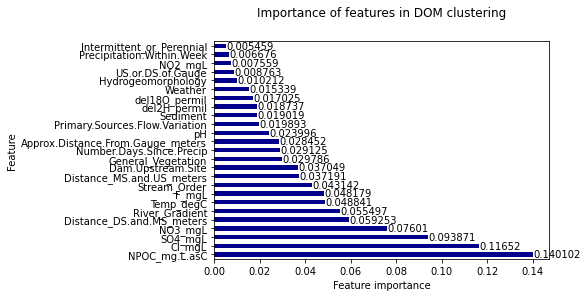

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import numpy as np

FI = (
    pd.Series(classifier.feature_importances_, index=X_train.columns)
    .nlargest(25)
    .plot(kind="barh", color="darkblue")
)

plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Importance of features in DOM clustering", pad=25)

# bar labelling guide https://stackoverflow.com/questions/52182746/matplotlib-horizontal-bar-plot-add-values-to-bars
for i, v in enumerate(imp1):
    plt.text(v + 0.0001, i, str(round(v, 6)), color="black", va="center")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("water_FI_RF.png", dpi=500, bbox_inches='tight')